<a href="https://colab.research.google.com/github/Balajilp/WebScrapping-Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_analysis_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter Sentiment Analysis on Indian Top Online Retailers

In [55]:
!pip install nltk

In [56]:
# filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [57]:
# integrating google colab with drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [58]:
# Loading The Data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter-Sentiment-Analysis-main/Twitter.csv')
df.head()

,Datetime,Tweet Id,Name,tweet,Company_Name
0,2021-12-19 09:25:50+00:00,1472498398989332482,KariBethReilly,:. @amazonsupport wow. https://t.co/KSwzvYkyg6,AmazonIndia
1,2021-12-15 10:56:04+00:00,1471071555178299392,nkjindal111,@AmazonHelp #Amazon #AmazonSupport executive a...,AmazonIndia
2,2021-12-15 10:53:23+00:00,1471070879601680386,nkjindal111,@AmazonHelp As expected ...still waiting for t...,AmazonIndia
3,2021-12-13 07:01:36+00:00,1470287774011904002,GVikramjeet,#amazonsupport hello sir I order for one thing...,AmazonIndia
4,2021-12-08 07:28:24+00:00,1468482577241575424,nkjindal111,Shame on #ASUS #Amazon #AmazonSupport\nI have ...,AmazonIndia


In [59]:
# shape of the DataFrame
df.shape

(26681, 5)

In [60]:
## Taking Company_Name and tweet for Analysis
df2 = df[['Company_Name', 'tweet']]

In [61]:
# Checking is There any Null values in the DataFrame
df2.isnull().sum()

Company_Name    0
tweet           0
dtype: int64

In [62]:
# printing the Top 5 records of the DataFrame
df2.head()

,Company_Name,tweet
0,AmazonIndia,:. @amazonsupport wow. https://t.co/KSwzvYkyg6
1,AmazonIndia,@AmazonHelp #Amazon #AmazonSupport executive a...
2,AmazonIndia,@AmazonHelp As expected ...still waiting for t...
3,AmazonIndia,#amazonsupport hello sir I order for one thing...
4,AmazonIndia,Shame on #ASUS #Amazon #AmazonSupport\nI have ...


# Data Cleaning

In [63]:
# removing emojis
import re
def remove_emojis(tweet):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                  "]+", re.UNICODE)
    return re.sub(emoji, '', tweet)
df2['tweet'] = df2['tweet'].apply(remove_emojis)

In [64]:
#cleaning the text
def cleantext(text):

    text = re.sub(r"http\S+", "", text)       # removing the hyperlink 
    text= re.sub("@[A-Za-z0-9_]+","", text)   # removing the @user
    text = re.sub("#[A-Za-z0-9_]+","", text)  # removing the #user
    text = re.sub("^\\s+|\\s+$", "", text)    # removing leading and trailing white spaces
    text = re.sub("[^a-zA-Z]", " ", text)     # removing the non english words
    text = re.sub(r'(.)1+', r'1', text)       # removing the repeated tweet
    text = re.sub('[0-9]+', '', text)         # removing the numbers
    text = re.sub("\n", " ", text)            # removing the new line
    text = re.sub("[ \t]{2,}", " ", text)     # removing the two blank space
    return text
df2['tweet'] = df2['tweet'].apply(cleantext)

In [65]:
# removing small frequent words
df2['tweet'] = df2['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# Removing Punctuations
import string
english_punctuations = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)
df2['tweet']= df2['tweet'].apply(lambda x: cleaning_punctuations(x))

In [66]:
# installing wordcloud and all necessary packages from nltk
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [118]:
print(wordcloud.__version__)

AttributeError: ignored

In [67]:
# taking the list of stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwordlist = stopwords.words('english')   
new_stopwords = ['amazonsupport', 'amazon', 'amazonhelp', 'AmazonSupport','Amazon', 'help', 'Help',
             'flipkartsupport', 'flipkart', 'flipkarthelp', 'Flipkart', 'FlipkartSupport', 'FlipkartHelp', 
             'snapdealsupport', 'snapdeal', 'snapdealhelp', 'SnapDeal', 'SnapDealSupport', 'SnapDealHelp',
             'lenskartsupport', 'lenskart', 'lenskarthelp', 'LensKart', 'LensKartSupport', 'LensKartHelp',
             'zomatosupport', 'zomato', 'zomatohelp', 'Zomato', 'ZomatoSupport', 'ZomatotHelp',
             'bigbasketsupport', 'bigbasket', 'bigbaskethelp', 'BiBasket', 'BigBasketSupport', 'BigBasketHelp',
             'myntrasupport', 'myntra', 'myntrahelp', 'Myntra', 'MyntraSupport', 'MyntraHelp', 'support',
             'bigbazaar', 'bigbazaarhelp', 'BigBazaarHelp', 'customer', 'BibBazaarSupport', 'BIGBAZAAR', 'AMAZON',
             'FLIPKARAT', 'ZOMATO', 'LENSKART', 'BIGBASKET', 'MYNTRA', 'order']

# Adding to the list of words
stopwordlist.extend(new_stopwords)
# Removing the stopwords
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df2['tweet'] = df2['tweet'].apply(lambda text: cleaning_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
# showing the top 5 records of the Cleaned DataFrame
df2.head()

,Company_Name,tweet
0,AmazonIndia,wow
1,AmazonIndia,executive asking till date laptop every time n...
2,AmazonIndia,expected still waiting solution sucks
3,AmazonIndia,hello sir one thing cleared showed clicked got...
4,AmazonIndia,Shame purchased laptop thOct battery issue Asu...


In [69]:
# Checking is there any null values aftr Cleaning
df2.isnull().sum()

Company_Name    0
tweet           0
dtype: int64

# Lemmatization

In [70]:
# Begin Lemmatization 
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

    # lemmatize sentence using pos tag
def lemmatize_sentence(sentence):

    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 

    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:    

            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df2['tweet'] = df2['tweet'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [71]:
# Showing top 5 records after lemmatization
df2.head()

,Company_Name,tweet
0,AmazonIndia,wow
1,AmazonIndia,executive ask till date laptop every time need...
2,AmazonIndia,expect still wait solution suck
3,AmazonIndia,hello sir one thing clear show clicked get ite...
4,AmazonIndia,Shame purchase laptop thOct battery issue Asus...


## get polarity and subjectivity

In [72]:
# import textblob
from textblob import TextBlob

# Create a function to get the subjectivity
def getSujectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df2['Subjectivity'] = df2['tweet'].apply(getSujectivity)
df2['Polarity'] = df2['tweet'].apply(getPolarity)

In [73]:
# showing the top 5 records after creating subjectivity and polarity
df2.head()

,Company_Name,tweet,Subjectivity,Polarity
0,AmazonIndia,wow,1.000000,0.10
1,AmazonIndia,executive ask till date laptop every time need...,0.100000,0.00
2,AmazonIndia,expect still wait solution suck,0.000000,0.00
3,AmazonIndia,hello sir one thing clear show clicked get ite...,0.441667,0.30
4,AmazonIndia,Shame purchase laptop thOct battery issue Asus...,0.400000,-0.05


## Finding the positive and negative tweets using textblob

In [74]:
# Create a functin to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    else:
        return 'Positive'
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)

#show the Data
df2.head()

,Company_Name,tweet,Subjectivity,Polarity,Analysis
0,AmazonIndia,wow,1.000000,0.10,Positive
1,AmazonIndia,executive ask till date laptop every time need...,0.100000,0.00,Positive
2,AmazonIndia,expect still wait solution suck,0.000000,0.00,Positive
3,AmazonIndia,hello sir one thing clear show clicked get ite...,0.441667,0.30,Positive
4,AmazonIndia,Shame purchase laptop thOct battery issue Asus...,0.400000,-0.05,Negative


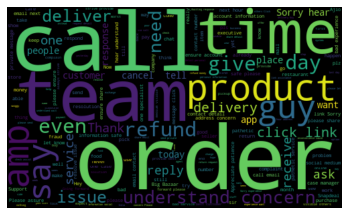

<Figure size 432x288 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#plotting word cloud 
words = " ".join([twts for twts in df2['tweet']])
wordcloud = WordCloud(width = 500,height=300).generate(words)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()
plt.savefig('foo.png')

In [76]:
# taking subjectivity and polarity in the new dataframe
df3 = df2.drop(['Subjectivity', 'Polarity'], axis=1)

## Plotting most frequent words from positive reviews using bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

# Subset positive review dataset
all_words_df = df3.loc[df3['Analysis'] == 'Positive',:]
all_words = all_words_df.groupby('Company_Name')

In [77]:
amazon_group = all_words.get_group('AmazonIndia')
Flipkart_group = all_words.get_group('Flipkart')
aSnapDeal_group = all_words.get_group('SnapDeal')
Mynthra_group = all_words.get_group('Mynthra')
Zomato_group = all_words.get_group('Zomato')
BigBazaar_group = all_words.get_group('BigBazaar')
Lenskart_group = all_words.get_group('Lenskart')
Ajio_group = all_words.get_group('Ajio')

In [78]:
amazon_group

,Company_Name,tweet,Analysis
0,AmazonIndia,wow,Positive
1,AmazonIndia,executive ask till date laptop every time need...,Positive
2,AmazonIndia,expect still wait solution suck,Positive
3,AmazonIndia,hello sir one thing clear show clicked get ite...,Positive
5,AmazonIndia,well within day Product deliver Dec today Dec ...,Positive
...,...,...,...
553,AmazonIndia,Hey Really Haryana Delhi saw message sell Sear...,Positive
555,AmazonIndia,Und bei mir hei Zustellstatus wenn da Paket dr...,Positive
556,AmazonIndia,day service reps give run around min phone fol...,Positive
557,AmazonIndia,Bluetooth set echo spot,Positive


## Plotting The positive and negative review of each company

In [79]:
visualize_words = df2.groupby('Company_Name')

amazon_group_vizu = visualize_words.get_group('AmazonIndia')
Flipkart_group_vizu = visualize_words.get_group('Flipkart')
aSnapDeal_group_vizu = visualize_words.get_group('SnapDeal')
Mynthra_group_vizu = visualize_words.get_group('Mynthra')
Zomato_group_vizu = visualize_words.get_group('Zomato')
BigBazaar_group_vizu = visualize_words.get_group('BigBazaar')
Lenskart_group_vizu = visualize_words.get_group('Lenskart')
Ajio_group_vizu = visualize_words.get_group('Ajio')

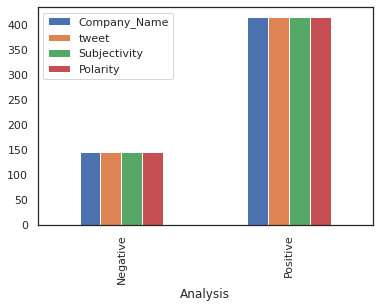

In [80]:
## AmazonIndian Positive and negative tweet ratio
amazon_group_vizu.groupby('Analysis').count().plot(kind='bar')

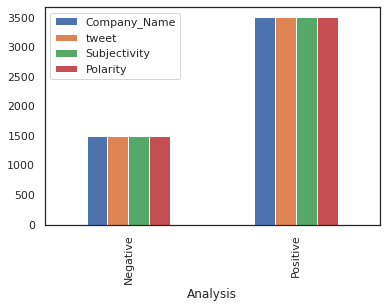

In [81]:
## flipkart Positive and negative tweet ratio
Flipkart_group_vizu.groupby('Analysis').count().plot(kind='bar')

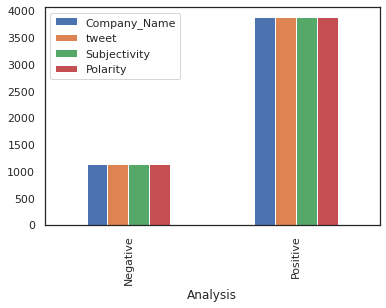

In [82]:
## snapDeal Positive and negative tweet ratio
aSnapDeal_group_vizu.groupby('Analysis').count().plot(kind='bar')

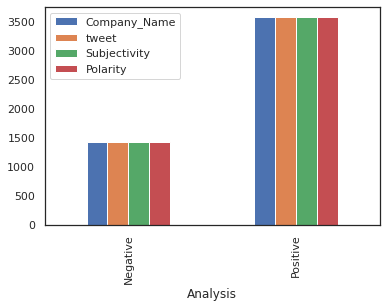

In [83]:
## Myntra Positive and negative tweet ratio
Mynthra_group_vizu.groupby('Analysis').count().plot(kind='bar')

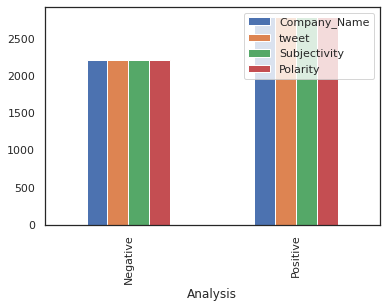

In [84]:
## zomato Positive and negative tweet ratio
Zomato_group_vizu.groupby('Analysis').count().plot(kind='bar')

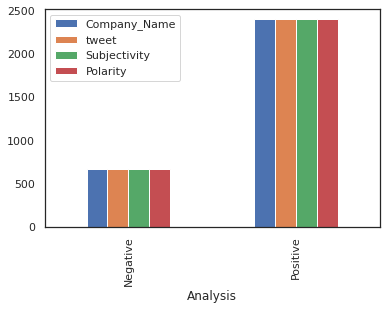

In [85]:
# BigBazaar Positive and Negative tweet Ratio
BigBazaar_group_vizu.groupby('Analysis').count().plot(kind='bar')

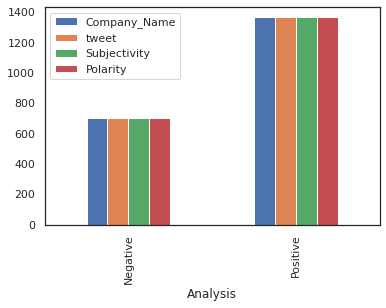

In [86]:
# Lenskadrt Positive and Negative Review Ratio
Lenskart_group_vizu.groupby('Analysis').count().plot(kind='bar')

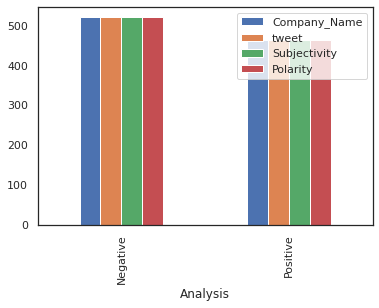

In [87]:
# Ajio Positive and Negative Review Ratio
Ajio_group_vizu.groupby('Analysis').count().plot(kind='bar')

## Amazon most frequent Positive words

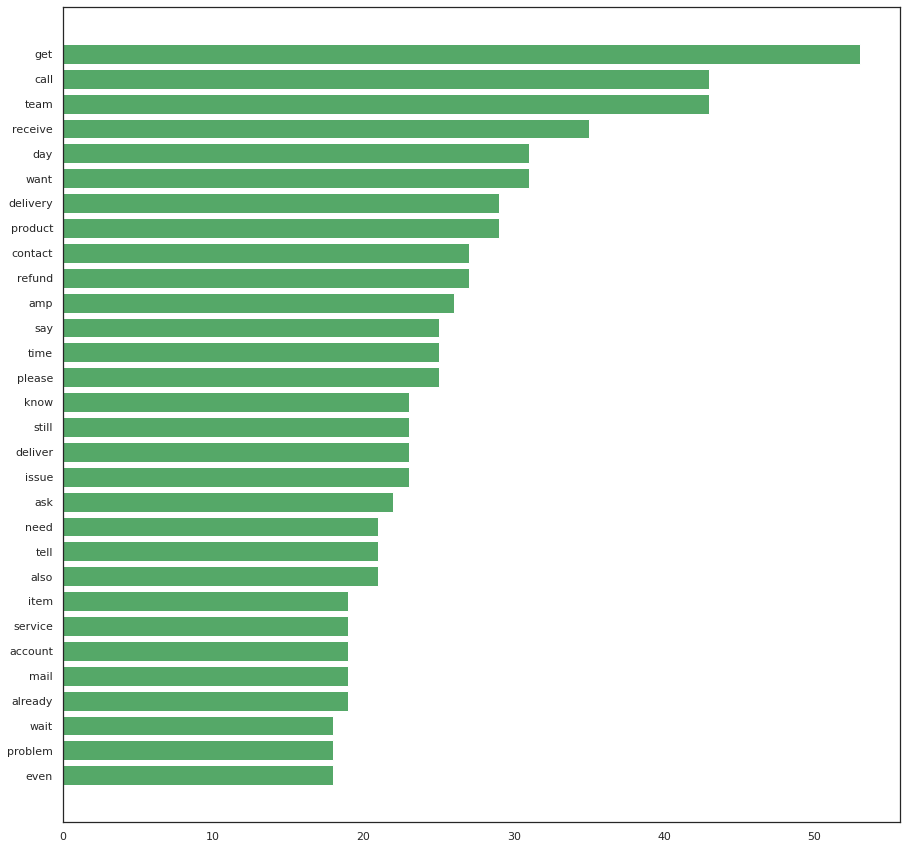

In [88]:
# taking subjectivity and polarity in the new dataframe
df3 = df2.drop(['Subjectivity', 'Polarity'], axis=1)

## Plotting most frequent words from positive reviews using bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

# Subset positive review dataset
amazon_df = amazon_group.loc[amazon_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in amazon_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

In [89]:
# Subset positive review dataset
all_words_df1 = df3.loc[df3['Analysis'] == 'Negative',:]
all_words1 = all_words_df1.groupby('Company_Name')

In [90]:
amazon_group1 = all_words1.get_group('AmazonIndia')
Flipkart_group1 = all_words1.get_group('Flipkart')
aSnapDeal_group1 = all_words1.get_group('SnapDeal')
Mynthra_group1 = all_words1.get_group('Mynthra')
Zomato_group1 = all_words1.get_group('Zomato')
BigBazaar_group1 = all_words1.get_group('BigBazaar')
Lenskart_group1 = all_words1.get_group('Lenskart')
Ajio_group1 = all_words1.get_group('Ajio')

## Amazon most frequent Negative words

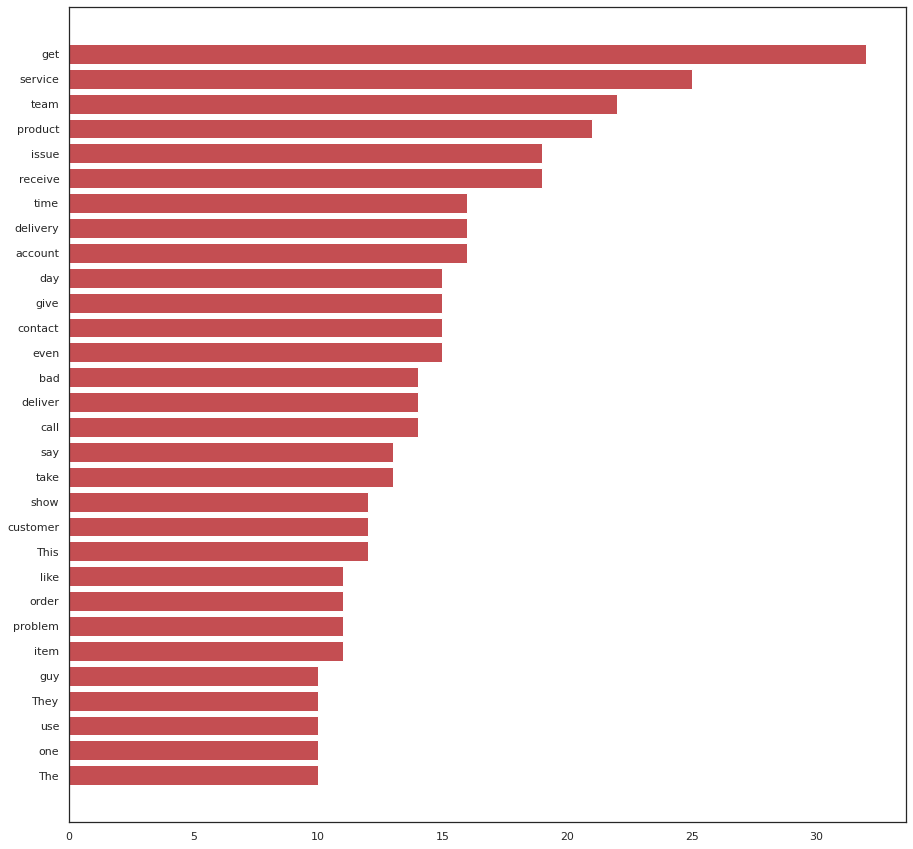

In [91]:
# Subset positive review dataset
amazon_df1 = amazon_group1.loc[amazon_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in amazon_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## Flipkart most frequent positive words

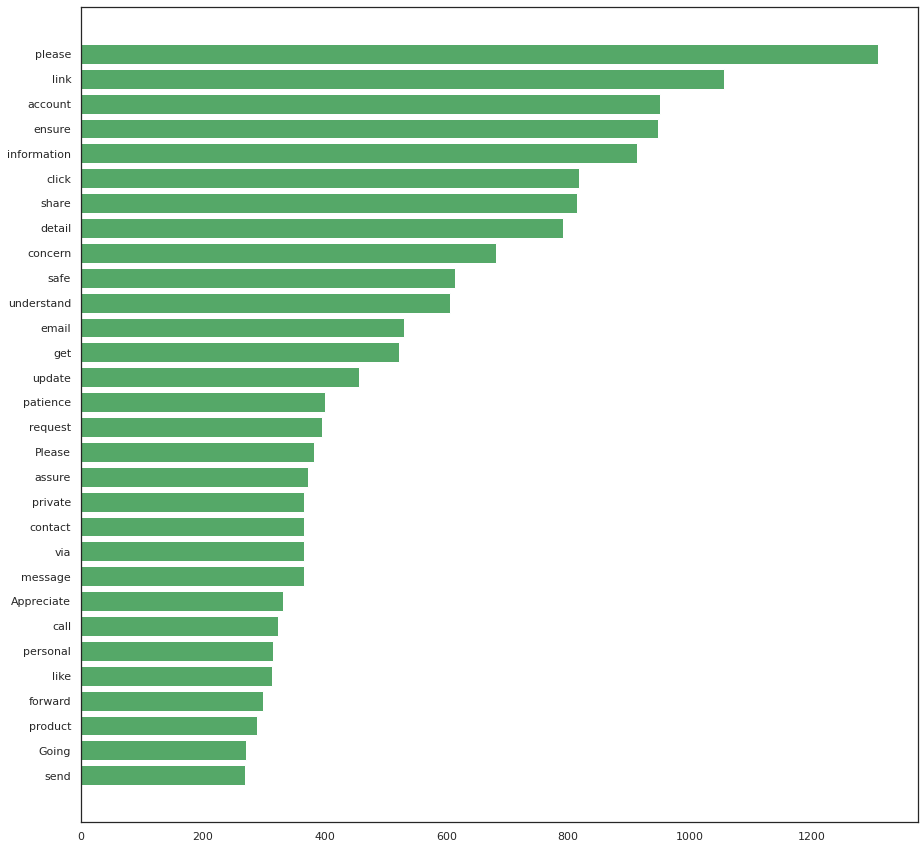

In [92]:
# Subset positive review dataset
flipkart_df = Flipkart_group.loc[Flipkart_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in flipkart_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

## Flipkart Most Frequent Negative words

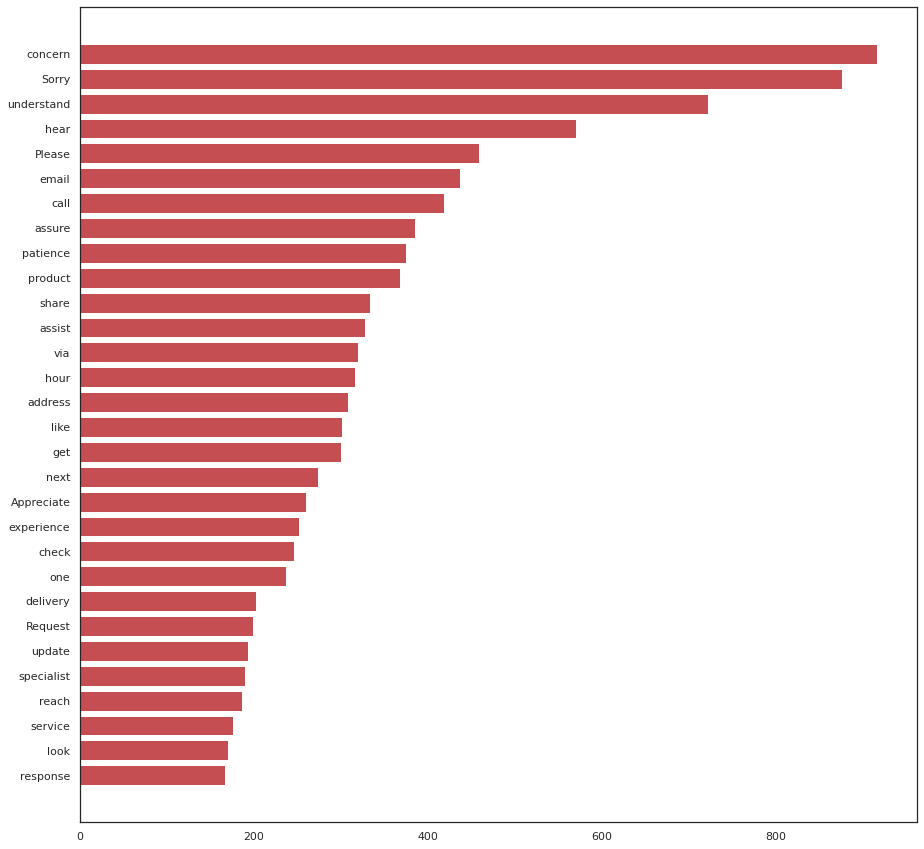

In [93]:
# Subset positive review dataset
flipkart_df1 = Flipkart_group1.loc[Flipkart_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in flipkart_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## SnapDeal Most Frequent Positive words

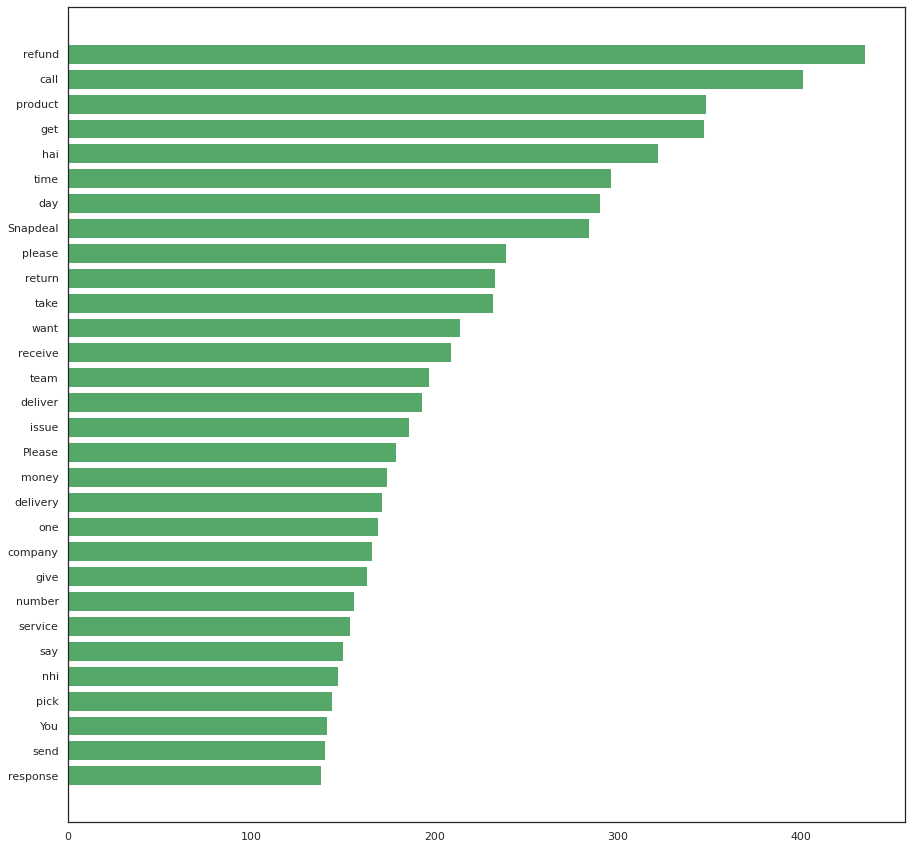

In [94]:
# Subset positive review dataset
snapdeal_df = aSnapDeal_group.loc[aSnapDeal_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in snapdeal_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

### Snapdeal most frequent negative words

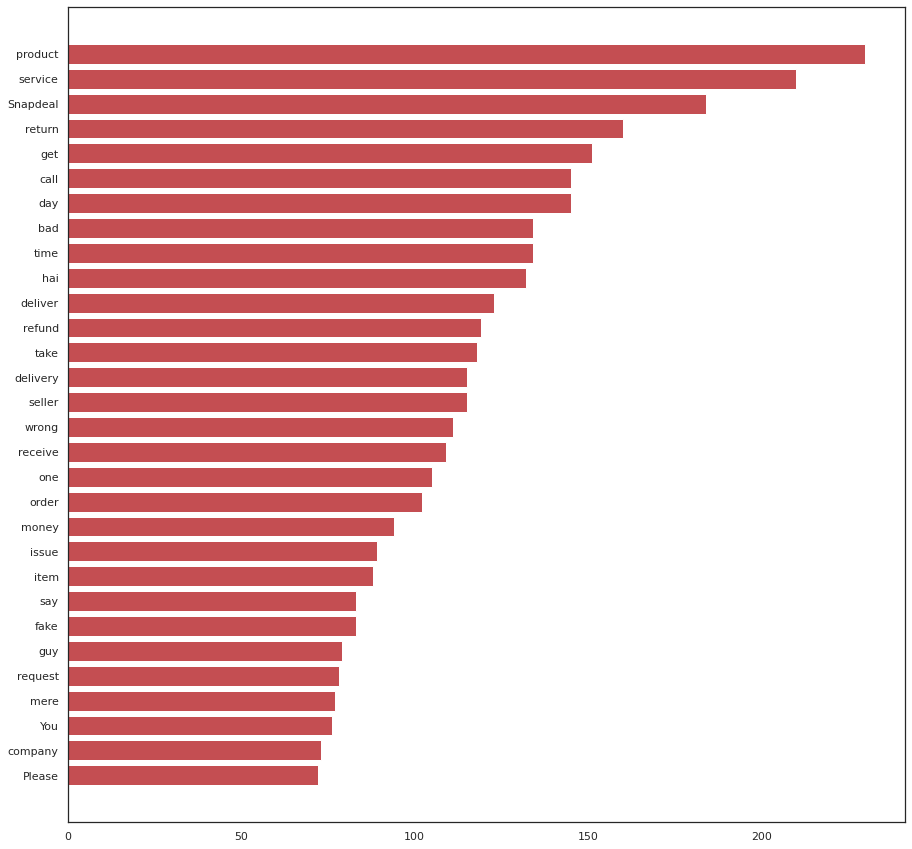

In [95]:
# Subset positive review dataset
snapdeal_df1 = aSnapDeal_group1.loc[aSnapDeal_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in snapdeal_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## Mynthra most frequent positive words

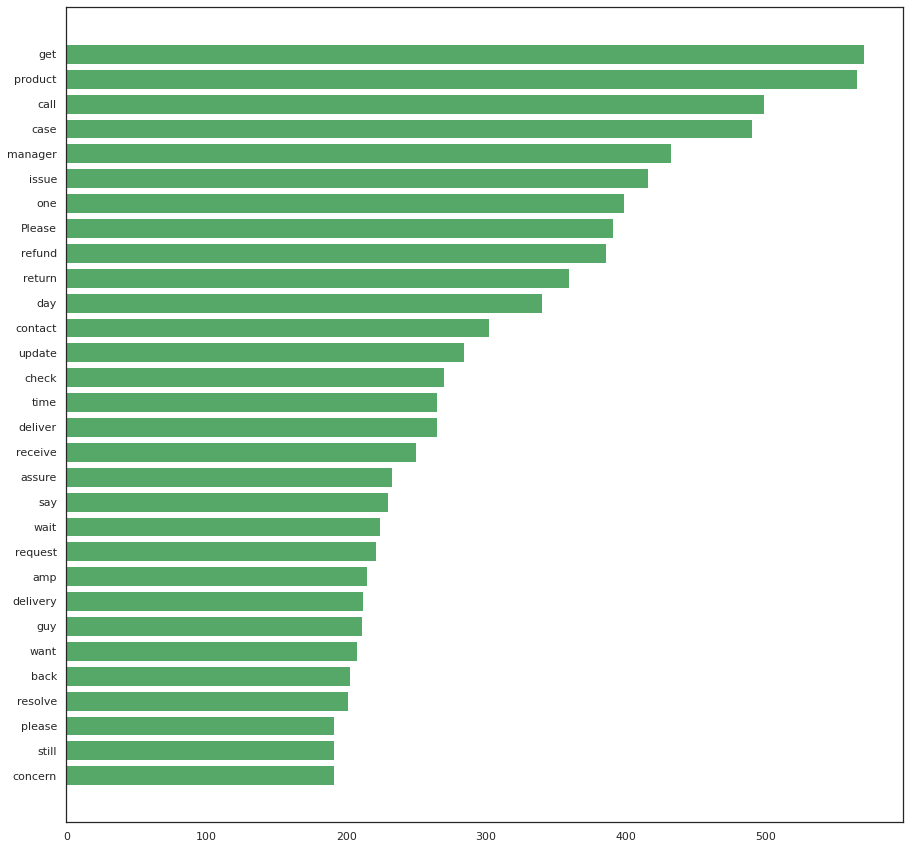

In [96]:
# Subset positive review dataset
Mynthra_df = Mynthra_group.loc[Mynthra_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Mynthra_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

## Mynthra most frequent Negative words

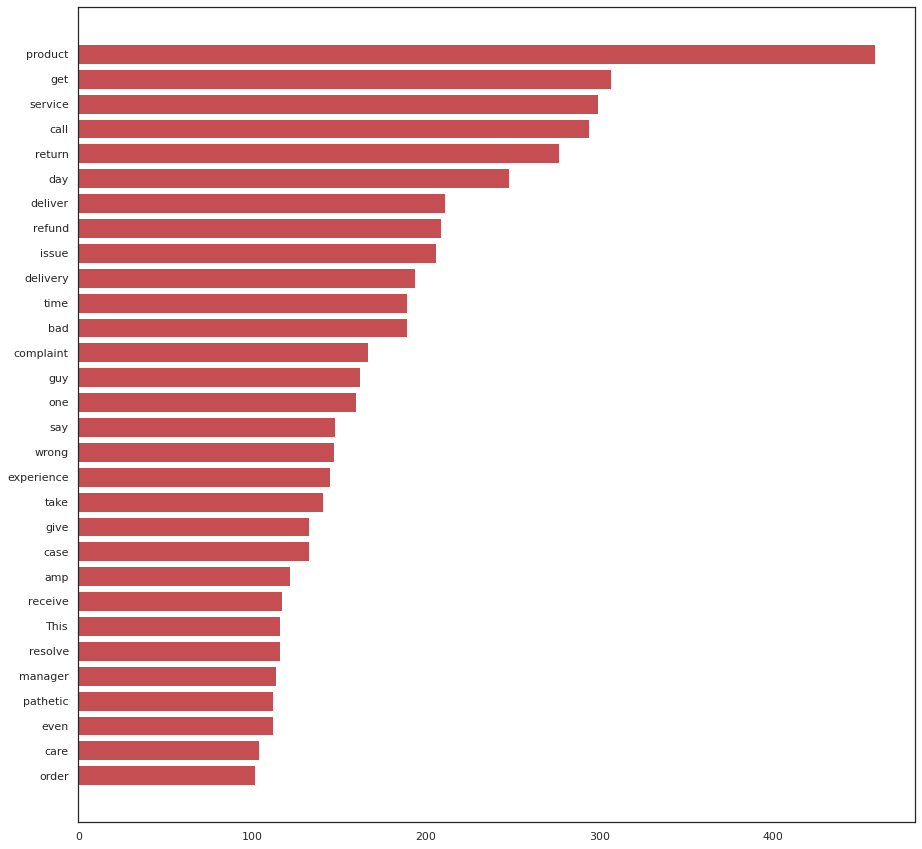

In [97]:
# Subset positive review dataset
Mynthra_df1 = Mynthra_group1.loc[Mynthra_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Mynthra_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## Zomato Most Frequent Positive words

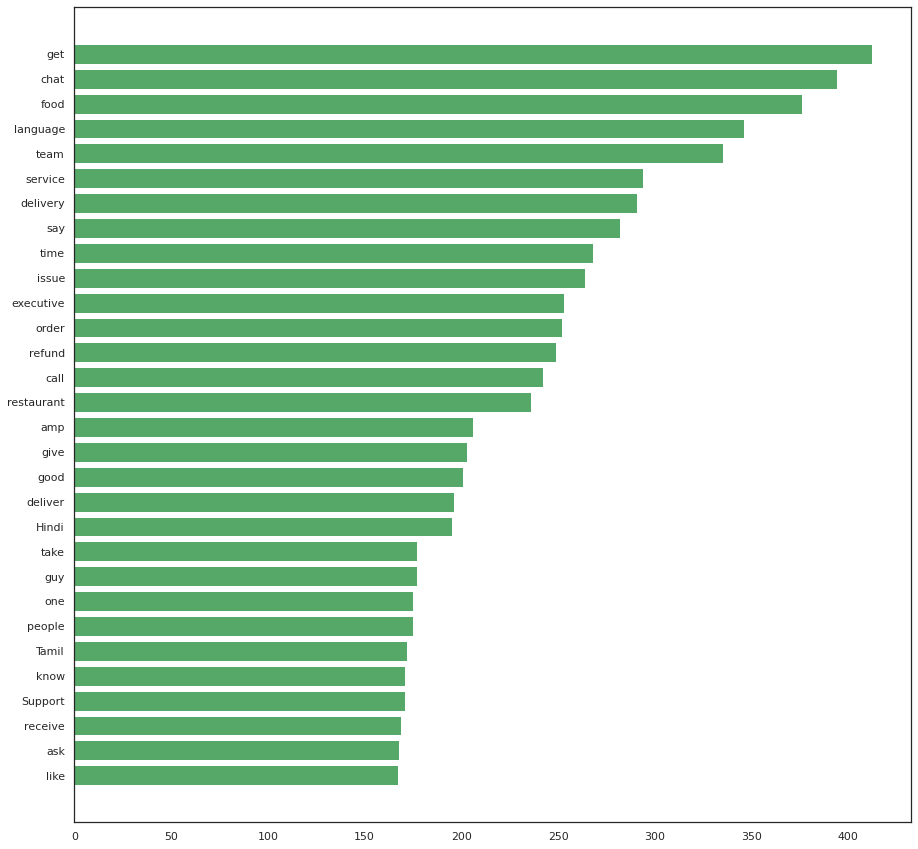

In [98]:
# Subset positive review dataset
Zomato_df = Zomato_group.loc[Zomato_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Zomato_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

## Zomato Most Frequent Negative Words

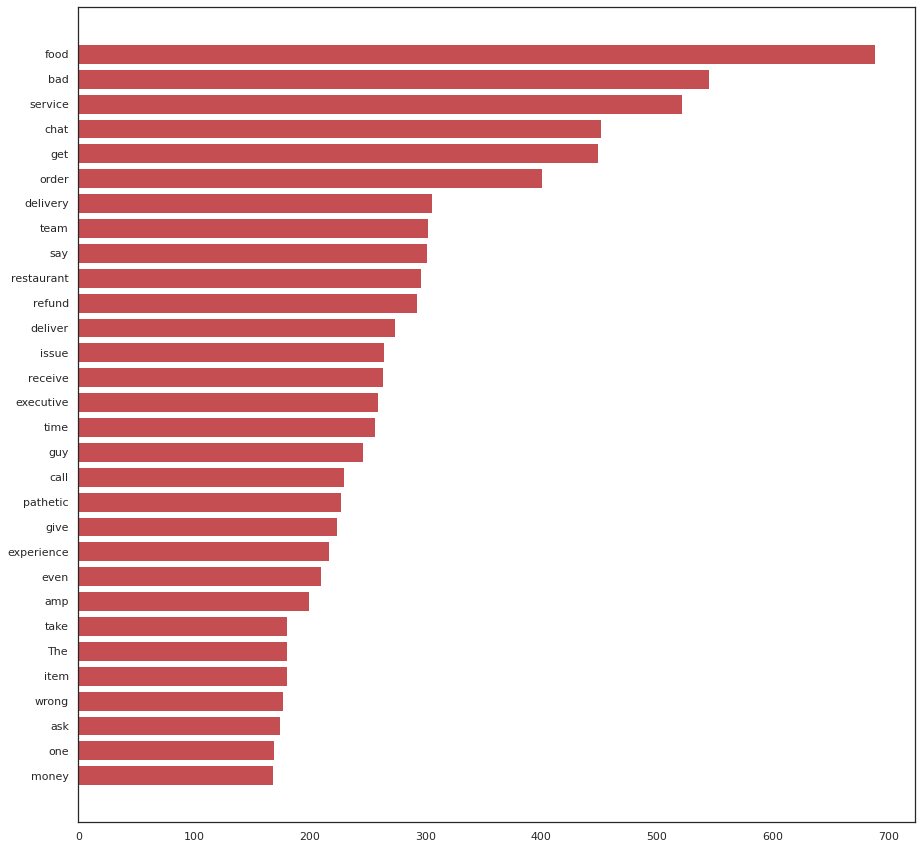

In [99]:
# Subset positive review dataset
Zomato_df1 = Zomato_group1.loc[Zomato_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Zomato_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## BigBazaar Most Frequent Positive Words

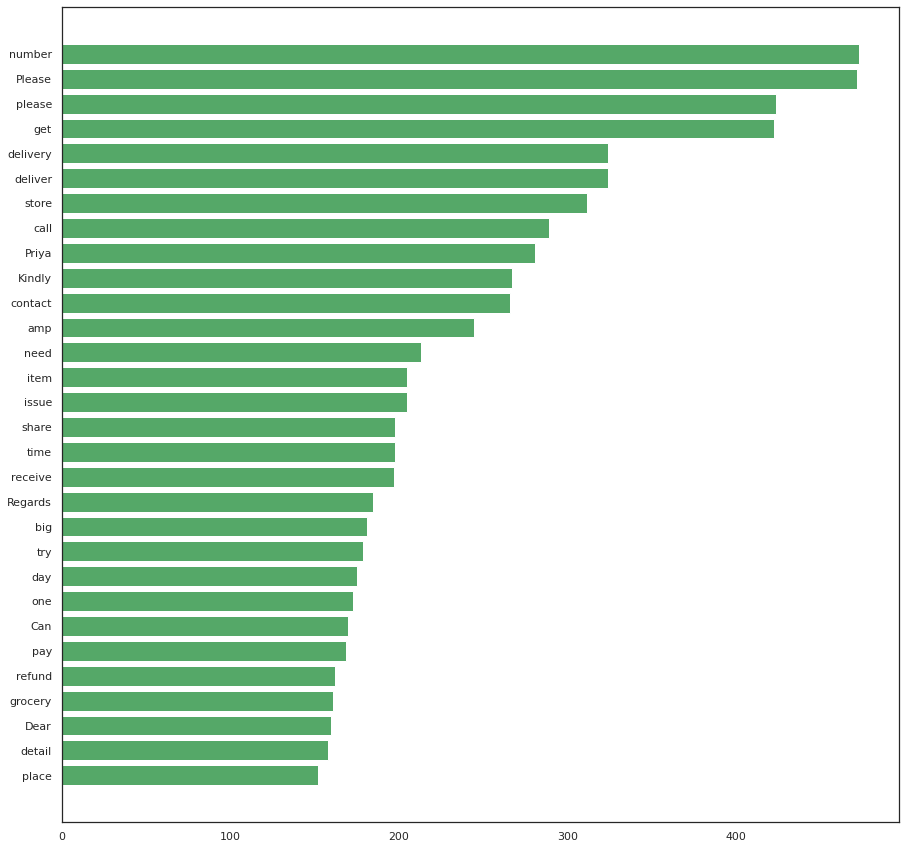

In [100]:
# Subset positive review dataset
bigbazaar_df = BigBazaar_group.loc[BigBazaar_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in bigbazaar_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

## BigBazaar Most Frequent Negative Words

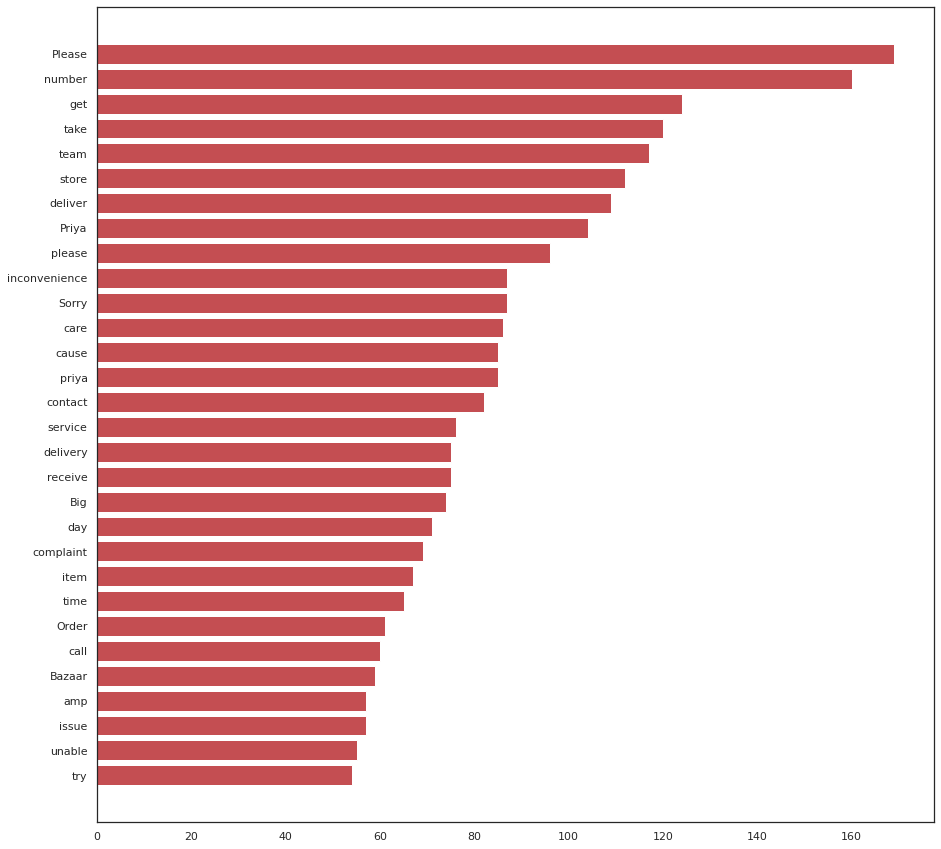

In [101]:
# Subset positive review dataset
bigbazaar_df1 = BigBazaar_group1.loc[BigBazaar_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in bigbazaar_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## Lenskart Most Frequent Positive Words

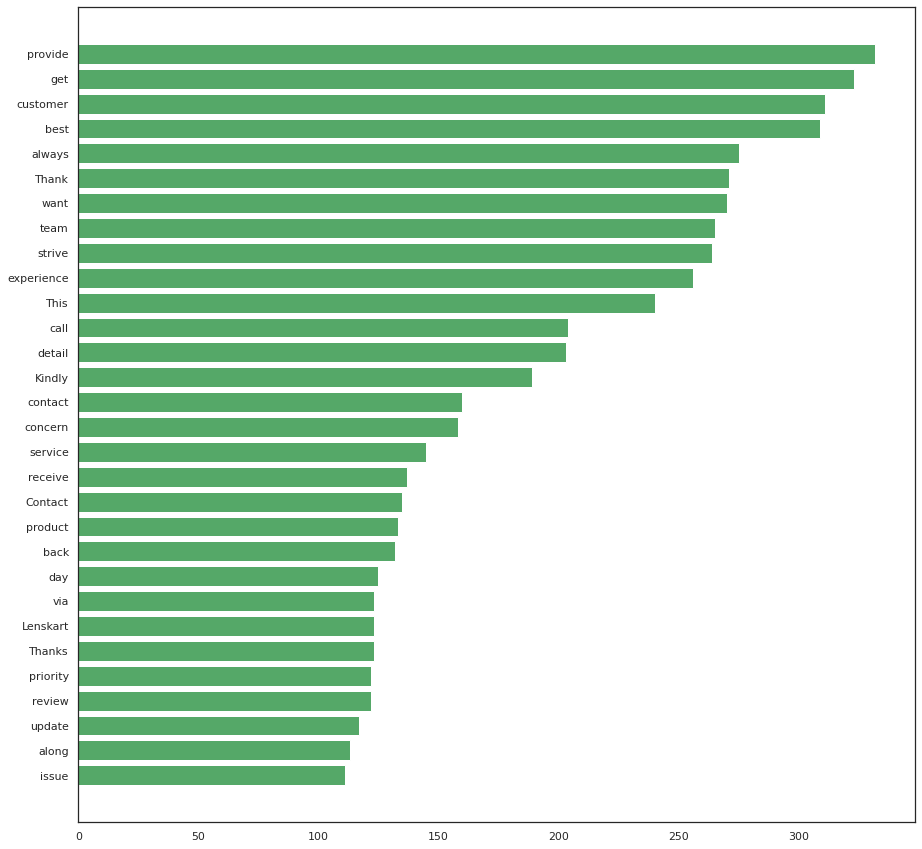

In [102]:
# Subset positive review dataset
Lenskart_df = Lenskart_group.loc[Lenskart_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Lenskart_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

## Lenskart Most Frequent Negative Words

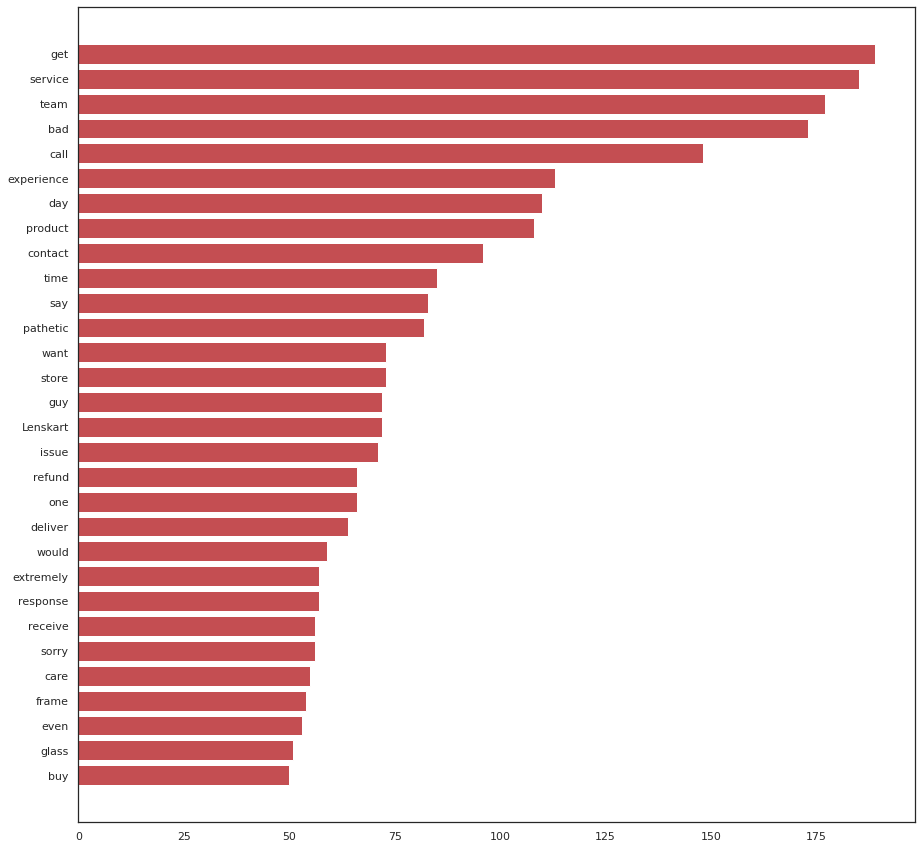

In [103]:
# Subset positive review dataset
Lenskart_df1 = Lenskart_group1.loc[Lenskart_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Lenskart_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

## Ajio Most Frequent Postive Words

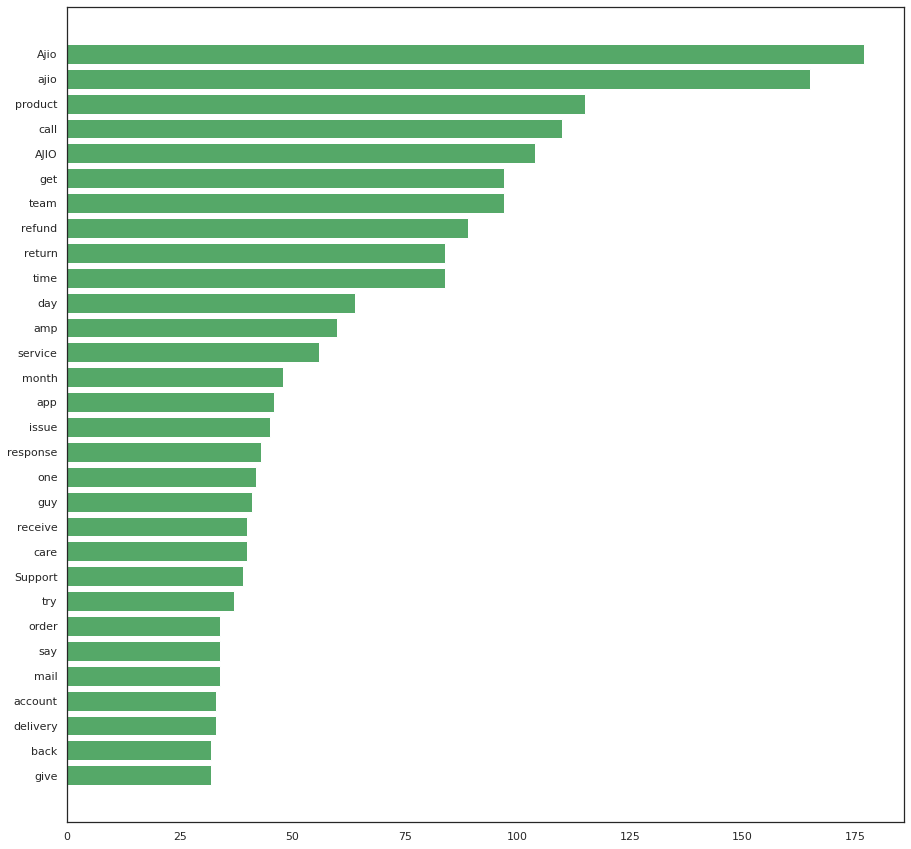

In [104]:
# Subset positive review dataset
Ajio_df = Ajio_group.loc[Ajio_group['Analysis'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Ajio_df['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='g')
plt.show()

## Ajio Most Frequent Negative words

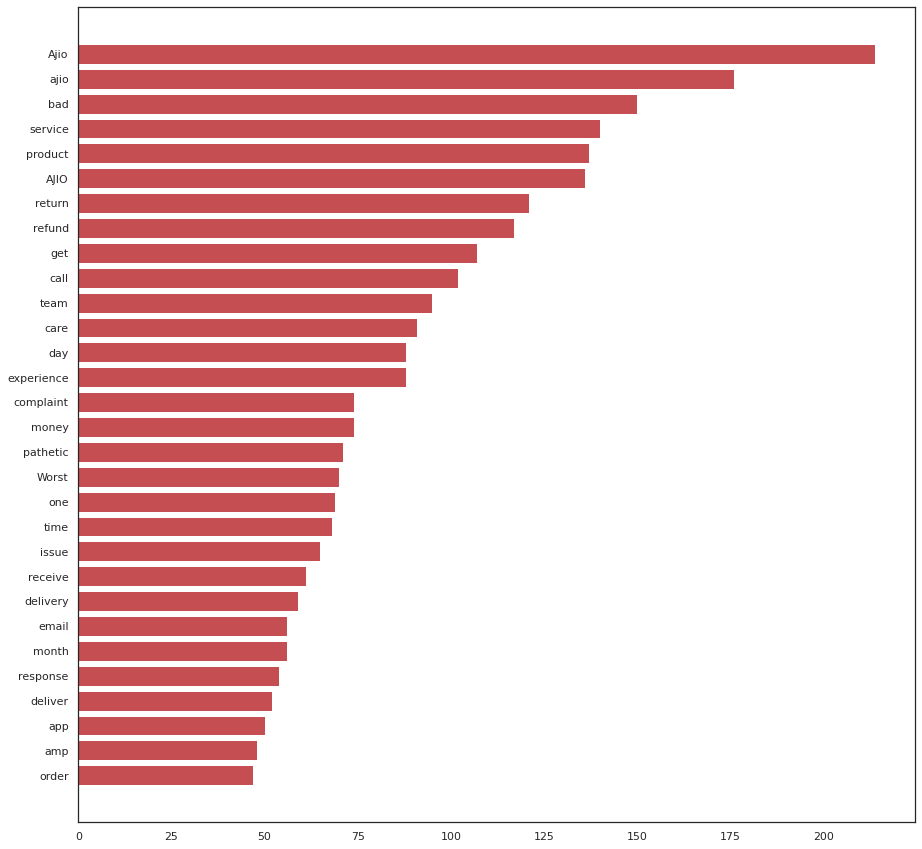

In [105]:
# Subset positive review dataset
Ajio_df1 = Ajio_group1.loc[Ajio_group1['Analysis'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in Ajio_df1['tweet']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(15,15))
ax = plt.barh(words_df['word'], width = words_df['count'], color='r')
plt.show()

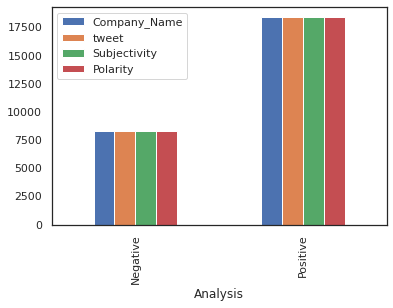

In [106]:
df2.groupby('Analysis').count().plot(kind='bar')

## Converting words to vectors

In [107]:
df3.head(1)

,Company_Name,tweet,Analysis
0,AmazonIndia,wow,Positive


In [108]:
# Importing module
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features = 2500)
tfidf_1 = TfidfVectorizer(max_features=2500)
X = tfidf_1.fit_transform(df3['tweet']).toarray()
y = df3.Analysis.map({'Positive' : 1, 'Negative' : 0}).values

In [109]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Model Building

In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
# predict output
y_pred1 = classifier.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
print("The model accuracy is", accuracy )

[[1438  282]
 [ 152 3465]]
The model accuracy is 0.9186809068765224


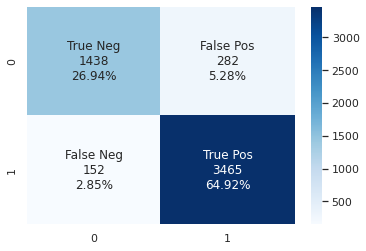

In [112]:
import numpy as np
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [113]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1720
           1       0.92      0.96      0.94      3617

    accuracy                           0.92      5337
   macro avg       0.91      0.90      0.90      5337
weighted avg       0.92      0.92      0.92      5337



In [114]:
# Roc_auc_score is 74%
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.9710518321106404

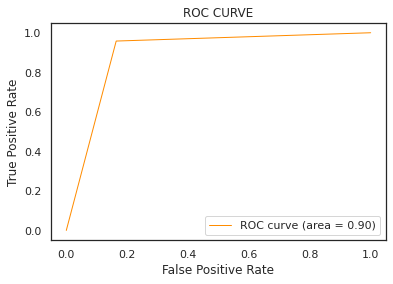

In [115]:
# plotting ROC curv
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [116]:
import pickle
filename = 'Sentiment_analysis.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [117]:
filename = 'transformer.pkl'
pickle.dump(tfidf_1,open(filename,'wb'))